In [37]:
## This block will install the primary library for this project, tensorflow

## This block is a chunk of imports that retrieves the remaining packages needed for the project

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import io
import pandas as pd
import ipywidgets as widgets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
sns.set(style="whitegrid")
print("Running Tensorflow Version:", tf.__version__)

Running Tensorflow Version: 2.5.0


## Run this block to retrieve and display the first few records from winedata.csv and ensure it uploaded correctly.

In [39]:
winedata_csv = 'https://raw.githubusercontent.com/SpencerRW117/WineAnalysis/main/winequalityN.csv'


#Make the primary dataframe here, named df
df = pd.read_csv(winedata_csv)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# We begin our analysis with a descriptive overview of our data

## A tableview of descriptive statistics (DESCRIPTIVE VISUALIZATION 1)

In [40]:
#Define the quality_score variable as the last field of our table
quality_score = df['quality']
#Utilizing a built-in data cleaning technique to drop null values from the frame
df.dropna(inplace=True)
#Generate a table of descriptive statistics for EACH numeric variable
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Quality score distribution (DESCRIPTIVE VISUALIZATION 2)

(array([ 246., 2138., 2836., 1079.,  198.]),
 array([3. , 4.2, 5.4, 6.6, 7.8, 9. ]),
 <BarContainer object of 5 artists>)

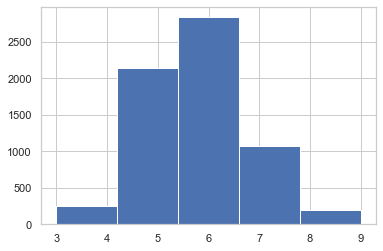

In [41]:
# Display a histogram showcasing the distribution of quality scores throughout the dataset
plt.hist(quality_score, bins = 5)

## Heatmap of correlation values between chemical attributes (DESCRIPTIVE VISUALIZATION 3)

<AxesSubplot:>

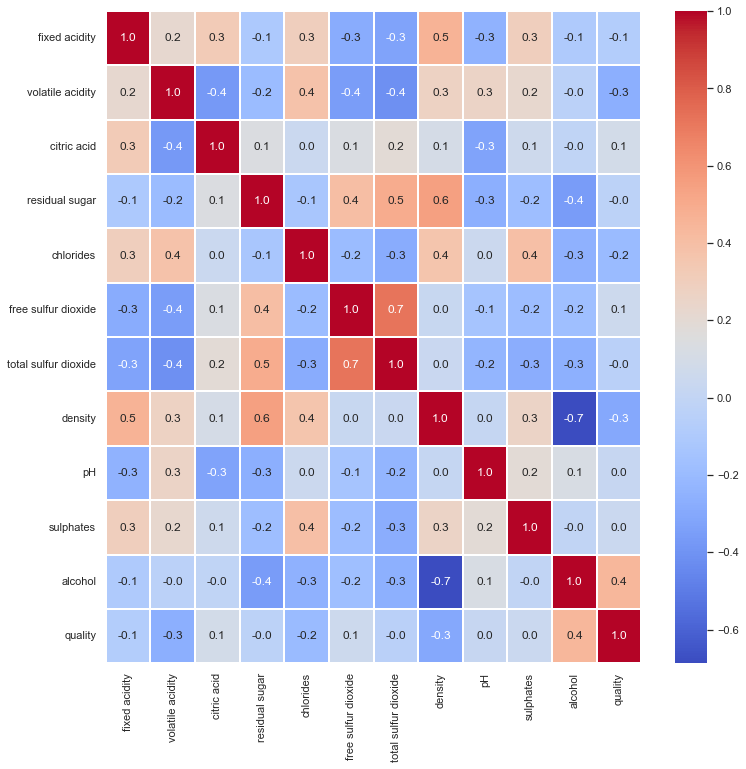

In [42]:
# Create a heatmap display showing the correlation coefficients for each variable
plt.figure(figsize = (12, 12))
train_corr = df.corr()
sns.heatmap(train_corr, cmap = "coolwarm", annot=True, fmt='.1f', linewidths = 0.05)

## A scatterplot of quality score vs alcohol content (DESCRIPTIVE VISUALIZATION 4)

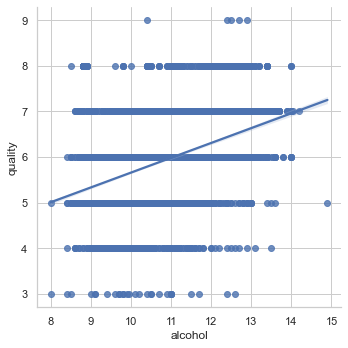

In [43]:
#Alcohol content has the strongest correlation to quality, so lets see a display of that
sns.lmplot(x = "alcohol", y = "quality", data = df)

# With our new descriptive understanding, we continute to creating a predictive model for our data

## Prepare data for analysis by a dense neural network

## Creating the DNN architecture

## Model is trained in the cell below, technical staff may adjust batch size and number of epochs to yield different prediction accuracy. 
## Model architecture may also be adjusted to reduce training time if imprecise predictions are needed rapidly. 

# With our trained model, we can now predict custom inputs of chemical data. 

## Use the sliders below to input the results of a chemical analysis, press "Calculate" to recieve a quality prediction. 

In [44]:
#Create the 11 widget sliders for the chemical analysis parameters

fixed_acidity = widgets.FloatSlider(value=7.2, min=3.8, max=10.0, step=0.01, description = "Fixed Acidity")
volatile_acidity = widgets.FloatSlider(value=0.33, min=0.08, max=1.0, step=0.01, description = "Volatile Acidity")
citric_acid = widgets.FloatSlider(value=0.33, min=0.0, max=1.0, step=0.01, description = "Citric Acid")
residual_sugar = widgets.FloatSlider(value=5.4, min=1, max=20, step=0.01, description = "Residual Sugar")
chlorides = widgets.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.001, description = "Chlorides")
free_SO2 = widgets.IntSlider(value=30, min=1, max=110, step=1, description = "Free SO2")
total_SO2 = widgets.IntSlider(value=115, min=50, max=225, step=1, description = "Total SO2")
density = widgets.FloatSlider(value=0.99, min=0.95, max=1.0, step=0.0001, description = "Density")
pH = widgets.FloatSlider(value=3.2, min=2.75, max=3.80, step=0.01, description = "pH")
sulfates = widgets.FloatSlider(value=0.0, min=0.35, max=0.75, step=0.001, description = "Sulfates")
alcohol = widgets.FloatSlider(value=10.5, min=8, max=15.0, step=0.01, description = "Alcohol")

widget_box = widgets.VBox([fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_SO2, total_SO2,
                          density, pH, sulfates, alcohol])
children = [widget_box]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, "Chemical Properties")
tab


# To run additional predictions, adjust the sliders, re-run the cell below, and click the "Predict Quality" button again. 

In [47]:
# Store slider data (the user's prediction) in a list.
model = 'trained_wine_model.h5'

user_pred = [[fixed_acidity.value, volatile_acidity.value, citric_acid.value, residual_sugar.value,
            chlorides.value, free_SO2.value, total_SO2.value,
            density.value, pH.value, sulfates.value, alcohol.value]]

print(user_pred)

def calculate_user_prediction(user_prediction):
    prediction_list = scaler.transform(user_prediction)
    return min(model.predict(prediction_list), 10)



# Define an on_click handler for the calculate button, display the button, and output our prediction. 
def on_calculate_click(_):
    prediction = calculate_user_prediction(user_pred)
    with out:
        out.clear_output()
        print("##### PREDICTION #####")
        print("For a wine with the selected chemical properties, our model predicts a quality score of:", round(prediction[0][0], 2))
        print("##### ACCURACY #####")
        print("Mean Absolute Error: " , round(mean_absolute_error(y_test, model.predict(x_test)), 2))
    return

button = widgets.Button(description="Predict Quality")
out = widgets.Output()

button.on_click(on_calculate_click)
widgets.VBox([button, out])



